In [3]:
from main import * 

# %load_ext autoreload
# %autoreload 2



filename = "feature_df_py.xlsx"  # df of files and factors

color_dict = {"pAD":"orange","Somatic":"blue","WASH":"lightsteelblue", "PRE":"black", "CONTROL": 'grey', "TCB2":'green', "DMT":"teal", "PSIL":"orange", "LSD":"purple", "MDL":'blue', 'I_display':'cornflowerblue'} 
saveColors(filename, color_dict) #cache colors relative to filename




COLORS {'pAD': 'orange', 'Somatic': 'blue', 'WASH': 'lightsteelblue', 'PRE': 'black', 'CONTROL': 'grey', 'TCB2': 'green', 'DMT': 'teal', 'PSIL': 'orange', 'LSD': 'purple', 'MDL': 'blue', 'I_display': 'cornflowerblue'} SAVED TO /Users/owner/Desktop/IGOR_phd/input/cache/feature_df_py SUBCACHE


In [ ]:
#  unpack df
cell_dict = checkFeatureDF(filename, from_scratch=True) 


ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

        folder_file     cell_id data_type           drug  conc_uM  \
1691  JJB230830/t41  TLX230830d        AP  TCB2_CNQX_AP5      1.0   

      replication_no  application_order drug_in drug_out       I_set  \
1691               1                  1      22       34  short step   

      R_series  R_tip cell_type cell_subtype sex  offset  weight P_age  \
1691       NaN    7.2   L5a_TLX         None   F     0.0    19.0    65   

     Bistable  pAD  
1691      NaN  NaN  


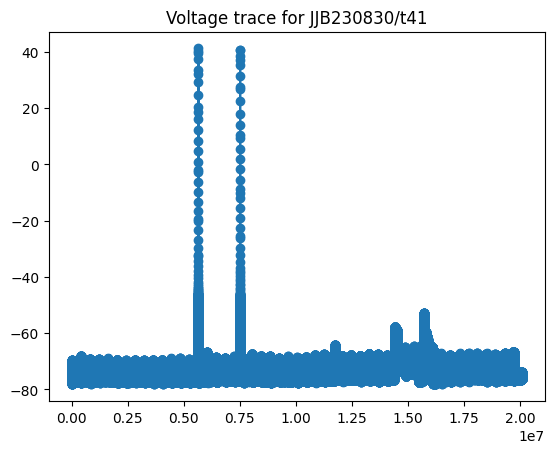

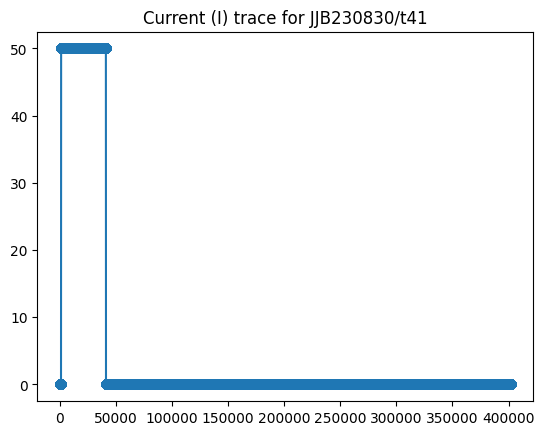

In [3]:
#check a specific file 
quick_plot_file(filename, 'JJB230830/t41')

In [11]:
#get the expanded feature df for a single cell type #runs for 'L5b_SIM' 'L6b_DRD'

cell_type_expanded_df = getorbuildExpandedDF(filename, 'L5a_TLX_feature_df_expanded', buildExpandedDF_cell_type, cell_type='L5a_TLX', from_scratch=False)

# print(cell_type_expanded_df.columns)

# cell_type_expanded_df['traceback']

# subselectDf(cell_type_expanded_df, {'error':'TypeError: cannot unpack non-iterable NoneType object'})

# cell_type_expanded_df[cell_type_expanded_df['error']!= 'ran'][['error', 'cell_id']]

cell_type_expanded_df[cell_type_expanded_df['error']!= 'ran']['error'].unique()




GETTING "L5a_TLX_feature_df_expanded" FROM "feature_df_py" CACHE


array(['TypeError: cannot unpack non-iterable NoneType object',
       'LinAlgError: SVD did not converge in Linear Least Squares'],
      dtype=object)

In [11]:
# get expanded  df for entire feature df 
expanded_df = getorbuildExpandedDF(filename, 'feature_df_expanded', buildExpandedDF, from_scratch=False)

expanded_df=subselectDf(expanded_df, {'error':'ran', 'data_type':'AP'})
expanded_df
# print(expanded_df)

# expanded_df['AP_height']

# expanded_df.filter(like='AP_locs')

GETTING "feature_df_expanded" FROM "feature_df_py" CACHE


,WASH_pAD_AP_locs,PRE_pAD_AP_locs,PRE_Somatic_AP_locs,APP_pAD_AP_locs,AP_locs,APP_Somatic_AP_locs,WASH_Somatic_AP_locs
3,"[139149, 278246, 129235, 55804, 392274, 57442,...",[],[],[],"[139149, 278246, 129235, 55804, 392274, 377297...",[],"[377297, 81244, 362325, 385121, 14240, 44322, ..."
8,"[371017, 292817, 320479, 329030, 67719, 74034,...",[197416],"[274830, 23868, 76625, 204155, 291432, 42037]",[],"[274830, 23868, 76625, 197416, 204155, 291432,...","[285082, 298737, 308136, 318443]","[313267, 332015, 343107, 352911, 360997, 38446..."
13,[],[],[],[],[102880],[102880],[]
18,[],"[311115, 324739]","[331332, 338580, 342948, 347924]",[],"[311115, 324739, 331332, 338580, 342948, 347924]",[],[]
21,"[396300, 212886, 222312, 245101, 253494, 26961...","[37827, 74264, 117263, 251329, 12421, 79469, 3...",[282552],[134100],"[37827, 74264, 117263, 251329, 12421, 79469, 3...","[364918, 26182, 134774, 395176]","[133380, 149168, 154105, 208205, 33699, 49751,..."
...,...,...,...,...,...,...,...
1781,NaN,NaN,NaN,NaN,[],NaN,NaN
1788,NaN,NaN,NaN,NaN,[],NaN,NaN
1795,NaN,NaN,NaN,NaN,[],NaN,NaN
1802,NaN,NaN,NaN,NaN,[],NaN,NaN


In [ ]:
#APPLICATION TRACE PLOTTING
#FIX ME: allow for second aplication plotting also 


# getorbuildApplicationFig(filename, 'SIM230713a', from_scratch=True) #cell_df_or_id


#loop over all AP files and build from scratch
# loopBuildAplicationFigs(filename) #FIX ME: run out of active memeory

# plot_all_FI_curves(feature_df,  color_dict)  # generates PDF with all FI curves for single cell labed with drug and aplication order #### MAKE HZ NOT APs per sweep also isnt it in pA not nA??
# plot_FI_AP_curves(feature_df) #generated PDF with FI-AP for each cell

def APP_loop_plotter(filename_or_df, getorbuild_plotter_function, from_scratch=True ):

    if not isinstance(filename_or_df, pd.DataFrame):
        expanded_df = getorbuildExpandedDF(filename_or_df, 'feature_df_expanded', buildExpandedDF, from_scratch=False) #get df
    else:
        filename_or_df=expanded_df
    
    for cell_id in expanded_df['cell_id'].unique(): #loop over all unique cell_ids 
        cell_df = getCellDF(expanded_df, cell_id, data_type = 'AP')
        getorbuild_plotter_function(filename, cell_df, from_scratch=from_scratch) #check use for second aplications in AP_MEan ect

    return

APP_loop_plotter(filename, getorbuildApplicationFig, from_scratch=True)

In [7]:
#Action Potential Investigation (AP)

#EXAMPLE USE
# getorbuildAP_MeanFig(filename, 'TLX210328a', from_scratch=True) #cell_id_or_cell_df
# getorbuildAP_HistogramFig(filename, cell_id_or_cell_df, from_scratch=True)
# getorbuildAP_PhasePlotFig(filename, cell_id_or_cell_df, from_scratch=True)
# getorbuildAP_PCAFig(filename, cell_id_or_cell_df, from_scratch=None

cell_type_expanded_df = getorbuildExpandedDF(filename, 'L6b_DRD_feature_df_expanded', buildExpandedDF_cell_type, cell_type='L6b_DRD', from_scratch=False)



cell_df = getCellDF(cell_type_expanded_df, 'DRD210310a', data_type='AP')

getorbuildAP_MeanFig(filename, cell_df, from_scratch=True) 
getorbuildAP_HistogramFig(filename, cell_df, from_scratch=True) 
getorbuildAP_PhasePlotFig(filename, cell_df, from_scratch=True) 
getorbuildAP_PCAFig(filename, cell_df, from_scratch=True) 
getorbuildApplicationFig(filename, 'TLX230416a', from_scratch=True)




GETTING "L6b_DRD_feature_df_expanded" FROM "feature_df_py" CACHE
BUILDING "DRD210310a Mean APs Figure"


TypeError: cannot unpack non-iterable NoneType object

In [6]:
#this function is dependant on values from feature_df_expanded
#this will generate all plots that could also be gotten by getorbuildHistogram(finename, identifier) #FIX ME
loopCombinations_stats(filename)
#RuntimeWarning: Mean of empty slice. #FIX ME

GETTING "feature_df_expanded" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.v

Insufficient data for L5a_CBLforFiring_(Hz)
Insufficient data for L5a_CBLforVoltage_Threshold_(mV)
Insufficient data for L5a_CBLfor AP_Height_(mV)
Insufficient data for L5a_CBLforAP_slope_(V_s^-1)
Insufficient data for L5a_CBLforAP_width_(s) 
Insufficient data for L5a_CBLforAP_latency_(ms)
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PRE vs. CONTROL: Custom statistical test, P_val:4.168e-02
PRE vs. TCB2: Custom statistical test, P_val:4.161e-02
PRE vs. LSD: Custom statistical test, P_val:1.977e-03
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_Firing_(Hz).svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_Firing_(Hz).png
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PR

/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_LSD.png
Insuficient data for L5a_TLX with MDL application 
Insuficient data for L5a_TLX with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_TCB2.png
Insuficient data for L5b_CBL with TCB2 application 
Insuficient data for L5b_SIM with CONTROL application 
Insuficient data for L5b_SIM with DMT application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_LSD.png
Insuficient data for L5b_SIM with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_TCB2.png
Insuficient data for L5b_int with TCB2 application 
Insuficient data for L6b _DRD with CONTROL application 
Insuficient data for L6b _DRD with LSD application 
Insuficient data for L6b_ with TCB2 application 
Insuficient data for L6b_5HT_ with MDL application 
Insuficient data for L6b_5HT_ with TCB2 application 
Insuficient data for L6b_CTG with CONTROL application 
Insuficient data for L6b_CTG with LSD application 
Insuficient data for L6b_CTG with MDL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_CTG_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_CTG_pAD_vs_somatic_APs_TCB2.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_CONTROL.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_CONTROL.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_DMT.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_DMT.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_LSD.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_MDL.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_MDL.png
Insuficient data for L6b_DRD with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_TCB2.png


,folder_file,cell_id,data_type,drug,replication_no,application_order,drug_in,drug_out,I_set,R_series,...,mean_AP_slope_file,mean_AP_width_file,mean_AP_latency_file,max_firing_cell_drug,voltage_threshold_cell_drug,AP_height_cell_drug,AP_slope_cell_drug,AP_width_cell_drug,AP_latency_cell_drug,first_drug_AP
906,JJB230509/t11,CBL230509b,FP,PRE,1,0,NaN,NaN,NaN,47.0,...,82.629766,704.375000,0.975000,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
907,JJB230509/t12,CBL230509b,FP,PRE,2,0,NaN,NaN,NaN,44.0,...,90.947657,841.000000,0.866667,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
908,JJB230509/t13,CBL230509b,FP,PRE,3,0,NaN,NaN,NaN,44.0,...,87.167019,789.828571,0.871429,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
905,JJB230509/t8,CBL230509a,AP,TCB2,1,1,21.0,35.0,short step,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,JJB230509/t15,CBL230509b,AP,TCB2,1,1,9.0,22.0,short step,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,JJB230126/t42,DRD230126c,FP_AP,WASH,11,1,8.0,NaN,NaN,NaN,...,44.853426,767.400000,1.370000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,JJB230126/t43,DRD230126c,FP_AP,WASH,12,1,10.0,NaN,NaN,NaN,...,45.551643,685.200000,1.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724,JJB230301/t19,DRD230301a,FP_AP,WASH,14,1,NaN,NaN,NaN,73.0,...,65.450391,843.366667,1.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,JJB230301/t20,DRD230301a,FP_AP,WASH,15,1,NaN,NaN,NaN,73.0,...,63.155565,884.650000,1.175000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
